# 7호선 요일별 승하차 패턴분석

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Gulim'
plt.rcParams['axes.unicode_minus'] = False 

In [4]:
df = pd.read_csv('./data/CARD_SUBWAY_MONTH_202505 (1).csv', index_col= False)
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20250501,분당선,야탑,17571,18765,20250504
1,20250501,8호선,석촌,6970,8042,20250504
2,20250501,분당선,서현,16548,17173,20250504
3,20250501,경부선,독산,8851,8507,20250504
4,20250501,경부선,수원,35103,38426,20250504
...,...,...,...,...,...,...
19134,20250531,과천선,선바위,6421,5197,20250603
19135,20250531,공항철도 1호선,영종,4658,5004,20250603
19136,20250531,공항철도 1호선,인천공항2터미널,10249,7316,20250603
19137,20250531,공항철도 1호선,인천공항1터미널,16395,15278,20250603


In [10]:
print(df.head())
print(df.describe())
print(df.isnull().sum())

        사용일자  노선명  역명  승차총승객수  하차총승객수        요일
0 2025-05-01  분당선  야탑   17571   18765  Thursday
1 2025-05-01  8호선  석촌    6970    8042  Thursday
2 2025-05-01  분당선  서현   16548   17173  Thursday
3 2025-05-01  경부선  독산    8851    8507  Thursday
4 2025-05-01  경부선  수원   35103   38426  Thursday
                                사용일자         승차총승객수         하차총승객수
count                          19139   19139.000000   19139.000000
mean   2025-05-16 00:04:35.374889216   11581.145671   11530.513768
min              2025-05-01 00:00:00       1.000000       0.000000
25%              2025-05-08 00:00:00    4108.000000    3985.500000
50%              2025-05-16 00:00:00    8256.000000    7975.000000
75%              2025-05-24 00:00:00   15283.000000   15157.500000
max              2025-05-31 00:00:00  102915.000000  105169.000000
std                              NaN   11518.917971   11697.968781
사용일자      0
노선명       0
역명        0
승차총승객수    0
하차총승객수    0
요일        0
dtype: int64


## 데이터 전처리

In [ ]:
df['사용일자'] = df['사용일자'].astype(str)
df['사용일자'] = pd.to_datetime(df['사용일자'], errors='coerce')    # 사용일자 타입 변환
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,2025-05-01,분당선,야탑,17571,18765,20250504
1,2025-05-01,8호선,석촌,6970,8042,20250504
2,2025-05-01,분당선,서현,16548,17173,20250504
3,2025-05-01,경부선,독산,8851,8507,20250504
4,2025-05-01,경부선,수원,35103,38426,20250504
...,...,...,...,...,...,...
19134,2025-05-31,과천선,선바위,6421,5197,20250603
19135,2025-05-31,공항철도 1호선,영종,4658,5004,20250603
19136,2025-05-31,공항철도 1호선,인천공항2터미널,10249,7316,20250603
19137,2025-05-31,공항철도 1호선,인천공항1터미널,16395,15278,20250603


In [ ]:
df['요일'] = df['사용일자'].dt.day_name()   # 요일 컬럼 생성
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자,요일
0,2025-05-01,분당선,야탑,17571,18765,20250504,Thursday
1,2025-05-01,8호선,석촌,6970,8042,20250504,Thursday
2,2025-05-01,분당선,서현,16548,17173,20250504,Thursday
3,2025-05-01,경부선,독산,8851,8507,20250504,Thursday
4,2025-05-01,경부선,수원,35103,38426,20250504,Thursday
...,...,...,...,...,...,...,...
19134,2025-05-31,과천선,선바위,6421,5197,20250603,Saturday
19135,2025-05-31,공항철도 1호선,영종,4658,5004,20250603,Saturday
19136,2025-05-31,공항철도 1호선,인천공항2터미널,10249,7316,20250603,Saturday
19137,2025-05-31,공항철도 1호선,인천공항1터미널,16395,15278,20250603,Saturday


In [7]:
df.drop('등록일자', axis=1, inplace=True) # 불필요 데이터 제거
df

,사용일자,노선명,역명,승차총승객수,하차총승객수,요일
0,2025-05-01,분당선,야탑,17571,18765,Thursday
1,2025-05-01,8호선,석촌,6970,8042,Thursday
2,2025-05-01,분당선,서현,16548,17173,Thursday
3,2025-05-01,경부선,독산,8851,8507,Thursday
4,2025-05-01,경부선,수원,35103,38426,Thursday
...,...,...,...,...,...,...
19134,2025-05-31,과천선,선바위,6421,5197,Saturday
19135,2025-05-31,공항철도 1호선,영종,4658,5004,Saturday
19136,2025-05-31,공항철도 1호선,인천공항2터미널,10249,7316,Saturday
19137,2025-05-31,공항철도 1호선,인천공항1터미널,16395,15278,Saturday


In [ ]:
line_7_df = df[df['노선명'] == '7호선'].copy()  #7호선 데이터 필터링

In [54]:
# 7호선 고속터미널역부터 중곡역까지의 역 목록 (내 출퇴근길 반영)
target_stations_7ho = [
    '고속터미널', '반포', '논현', '학동', '강남구청', '청담', '자양',
    '건대입구', '어린이대공원', '군자', '중곡'
]

# 데이터 필터링
line_7_segment_df = line_7_df[line_7_df['역명'].isin(target_stations_7ho)].copy()

print(f"7호선 ({target_stations_7ho[0]} ~ {target_stations_7ho[-1]}) 구간 데이터 상위 5행:")
print(line_7_segment_df.head())
print(f"\n7호선 ({target_stations_7ho[0]} ~ {target_stations_7ho[-1]}) 구간 총 행 수: {len(line_7_segment_df)} 행")
print("\n7호선 특정 구간 데이터 정보:")
line_7_segment_df.info(11)

7호선 (고속터미널 ~ 중곡) 구간 데이터 상위 5행:
          사용일자  노선명    역명  승차총승객수  하차총승객수        요일
354 2025-05-01  7호선    중곡    7938    7196  Thursday
357 2025-05-01  7호선  건대입구   12150   12389  Thursday
359 2025-05-01  7호선    청담   10600   11231  Thursday
360 2025-05-01  7호선  강남구청    9022    9903  Thursday
361 2025-05-01  7호선    학동   10028   10212  Thursday

7호선 (고속터미널 ~ 중곡) 구간 총 행 수: 248 행

7호선 특정 구간 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 354 to 18908
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   사용일자    248 non-null    datetime64[ns]
 1   노선명     248 non-null    object        
 2   역명      248 non-null    object        
 3   승차총승객수  248 non-null    int64         
 4   하차총승객수  248 non-null    int64         
 5   요일      248 non-null    category      
dtypes: category(1), datetime64[ns](1), int64(2), object(2)
memory usage: 12.2+ KB


# 승하차 패턴 분석

In [46]:
segment_daily_total = line_7_segment_df.groupby('요일', observed=False)[['승차총승객수', '하차총승객수']].sum().reset_index()
print(f"\n7호선 ({target_stations_7ho[0]} ~ {target_stations_7ho[-1]}) 구간 요일별 총 승하차객수:")
print(segment_daily_total)


7호선 (고속터미널 ~ 중곡) 구간 요일별 총 승하차객수:
          요일  승차총승객수  하차총승객수
0     Monday  488448  484228
1    Tuesday  508963  504869
2  Wednesday  579388  588057
3   Thursday  653957  661731
4     Friday  717655  723551
5   Saturday  461193  450767
6     Sunday  266352  252187


In [47]:
segment_daily_avg = line_7_segment_df.groupby('요일', observed=False)[['승차총승객수', '하차총승객수']].mean().reset_index()
print(f"\n7호선 ({target_stations_7ho[0]} ~ {target_stations_7ho[-1]}) 구간 요일별 평균 승하차객수:")
print(segment_daily_avg)


7호선 (고속터미널 ~ 중곡) 구간 요일별 평균 승하차객수:
          요일       승차총승객수       하차총승객수
0     Monday  15264.00000  15132.12500
1    Tuesday  15905.09375  15777.15625
2  Wednesday  18105.87500  18376.78125
3   Thursday  16348.92500  16543.27500
4     Friday  17941.37500  18088.77500
5   Saturday  11529.82500  11269.17500
6     Sunday   8323.50000   7880.84375


In [49]:
segment_station_daily_pattern = line_7_segment_df.groupby(['역명', '요일'], observed=False)[['승차총승객수', '하차총승객수']].sum().reset_index()
segment_station_daily_pattern['승하차_비율'] = segment_station_daily_pattern['하차총승객수'] / segment_station_daily_pattern['승차총승객수']
segment_station_daily_pattern['승하차_비율'].replace([np.inf, -np.inf], np.nan, inplace=True)
segment_station_daily_pattern['승하차_비율'].fillna(0, inplace=True)
print(f"\n7호선 ({target_stations_7ho[0]} ~ {target_stations_7ho[-1]}) 구간 역별 요일별 총 승하차객수 (일부):")
print(segment_station_daily_pattern.head())


7호선 (고속터미널 ~ 중곡) 구간 역별 요일별 총 승하차객수 (일부):
     역명         요일  승차총승객수  하차총승객수    승하차_비율
0  강남구청     Monday   59036   65163  1.103784
1  강남구청    Tuesday   63198   70131  1.109703
2  강남구청  Wednesday   75507   83912  1.111314
3  강남구청   Thursday   84531   93809  1.109759
4  강남구청     Friday   91249  102382  1.122007


C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\2835493088.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  segment_station_daily_pattern['승하차_비율'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\2835493088.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

# 시각화

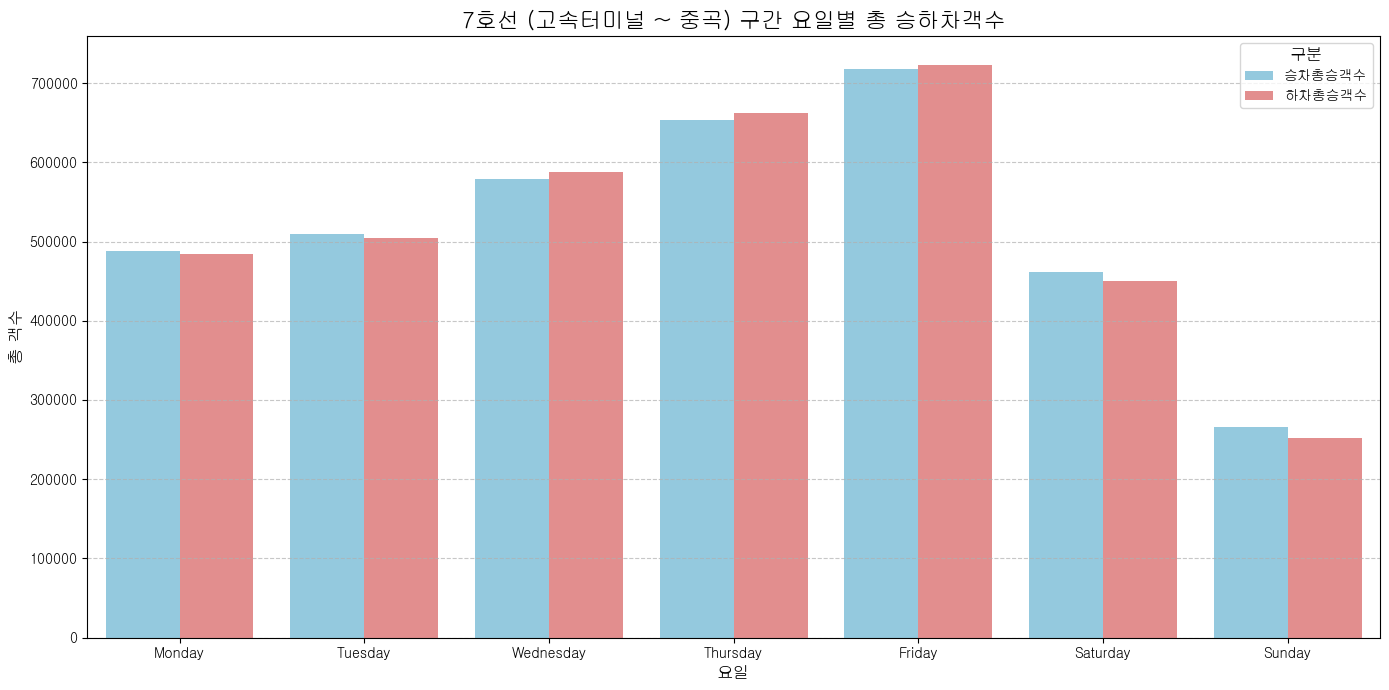

In [50]:
# 시각화를 위해 데이터프레임을 'long' 형식으로 변환 (melt)
segment_daily_total_melted = segment_daily_total.melt(
    id_vars='요일',
    value_vars=['승차총승객수', '하차총승객수'],
    var_name='구분',
    value_name='총 객수'
)

plt.figure(figsize=(14, 7))
sns.barplot(
    x='요일',
    y='총 객수',
    hue='구분', # '승차총승객수'와 '하차총승객수'를 구분하여 막대를 그림
    data=segment_daily_total_melted,
    palette={'승차총승객수': 'skyblue', '하차총승객수': 'lightcoral'} # 색상 지정
)
plt.title(f'7호선 ({target_stations_7ho[0]} ~ {target_stations_7ho[-1]}) 구간 요일별 총 승하차객수', fontsize=16)
plt.xlabel('요일', fontsize=12)
plt.ylabel('총 객수', fontsize=12)
plt.legend(title='구분', fontsize=10, title_fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

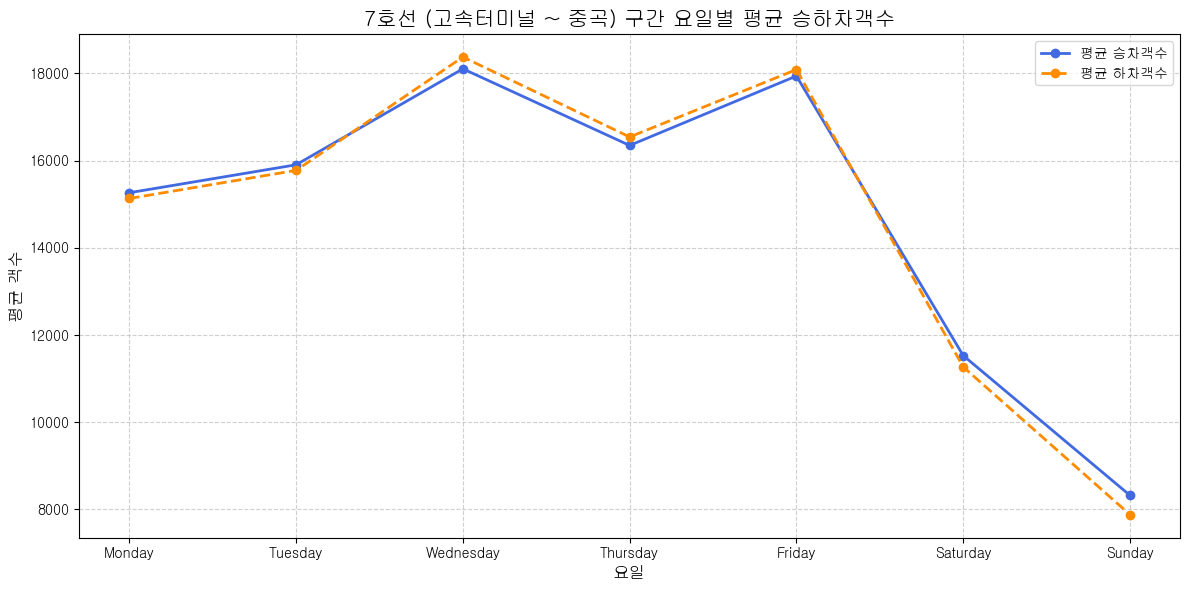

In [51]:
plt.figure(figsize=(12, 6))
plt.plot(segment_daily_avg['요일'], segment_daily_avg['승차총승객수'], marker='o', label='평균 승차객수', color='royalblue', linewidth=2)
plt.plot(segment_daily_avg['요일'], segment_daily_avg['하차총승객수'], marker='o', label='평균 하차객수', color='darkorange', linestyle='--', linewidth=2)
plt.title(f'7호선 ({target_stations_7ho[0]} ~ {target_stations_7ho[-1]}) 구간 요일별 평균 승하차객수', fontsize=15)
plt.xlabel('요일', fontsize=12)
plt.ylabel('평균 객수', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\3149444987.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  segment_station_pivot_in = segment_station_daily_pattern.pivot_table(index='역명', columns='요일', values='승차총승객수')


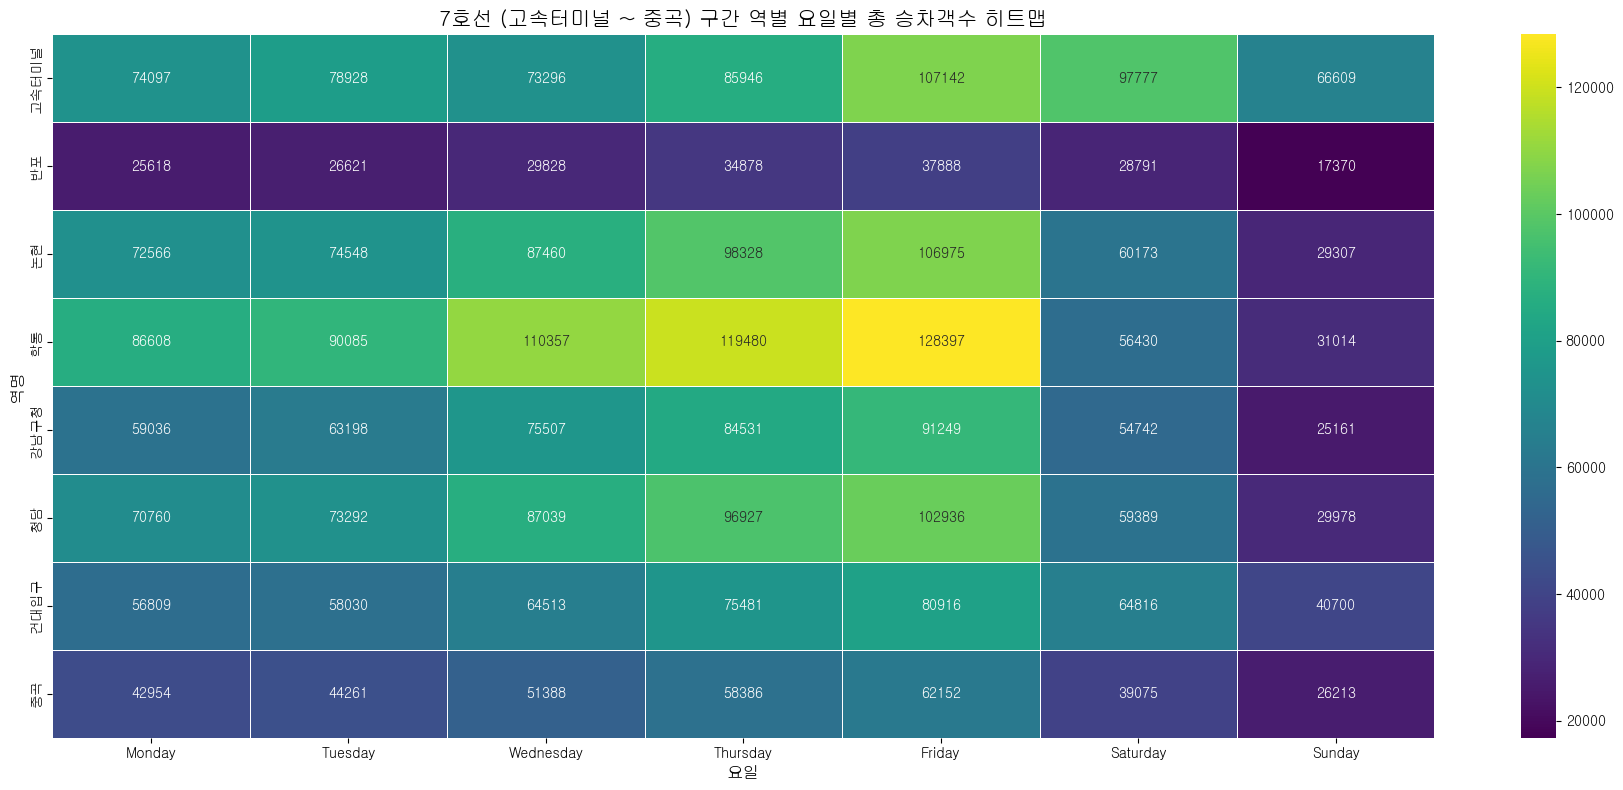

In [52]:
segment_station_daily_pattern['역명'] = pd.Categorical(
    segment_station_daily_pattern['역명'],
    categories=target_stations_7ho,
    ordered=True
)
segment_station_daily_pattern = segment_station_daily_pattern.sort_values('역명')


segment_station_pivot_in = segment_station_daily_pattern.pivot_table(index='역명', columns='요일', values='승차총승객수')
segment_station_pivot_in = segment_station_pivot_in[weekday_order] # 요일 순서 정렬

plt.figure(figsize=(18, max(8, len(segment_station_pivot_in) * 0.5))) # 역 수에 따라 높이 조절
sns.heatmap(segment_station_pivot_in, cmap='viridis', annot=True, fmt=".0f", linewidths=.5, linecolor='white')
plt.title(f'7호선 ({target_stations_7ho[0]} ~ {target_stations_7ho[-1]}) 구간 역별 요일별 총 승차객수 히트맵', fontsize=15)
plt.xlabel('요일', fontsize=12)
plt.ylabel('역명', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14832\3562074242.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  segment_station_pivot_in = segment_station_daily_pattern.pivot_table(index='역명', columns='요일', values='하차총승객수')


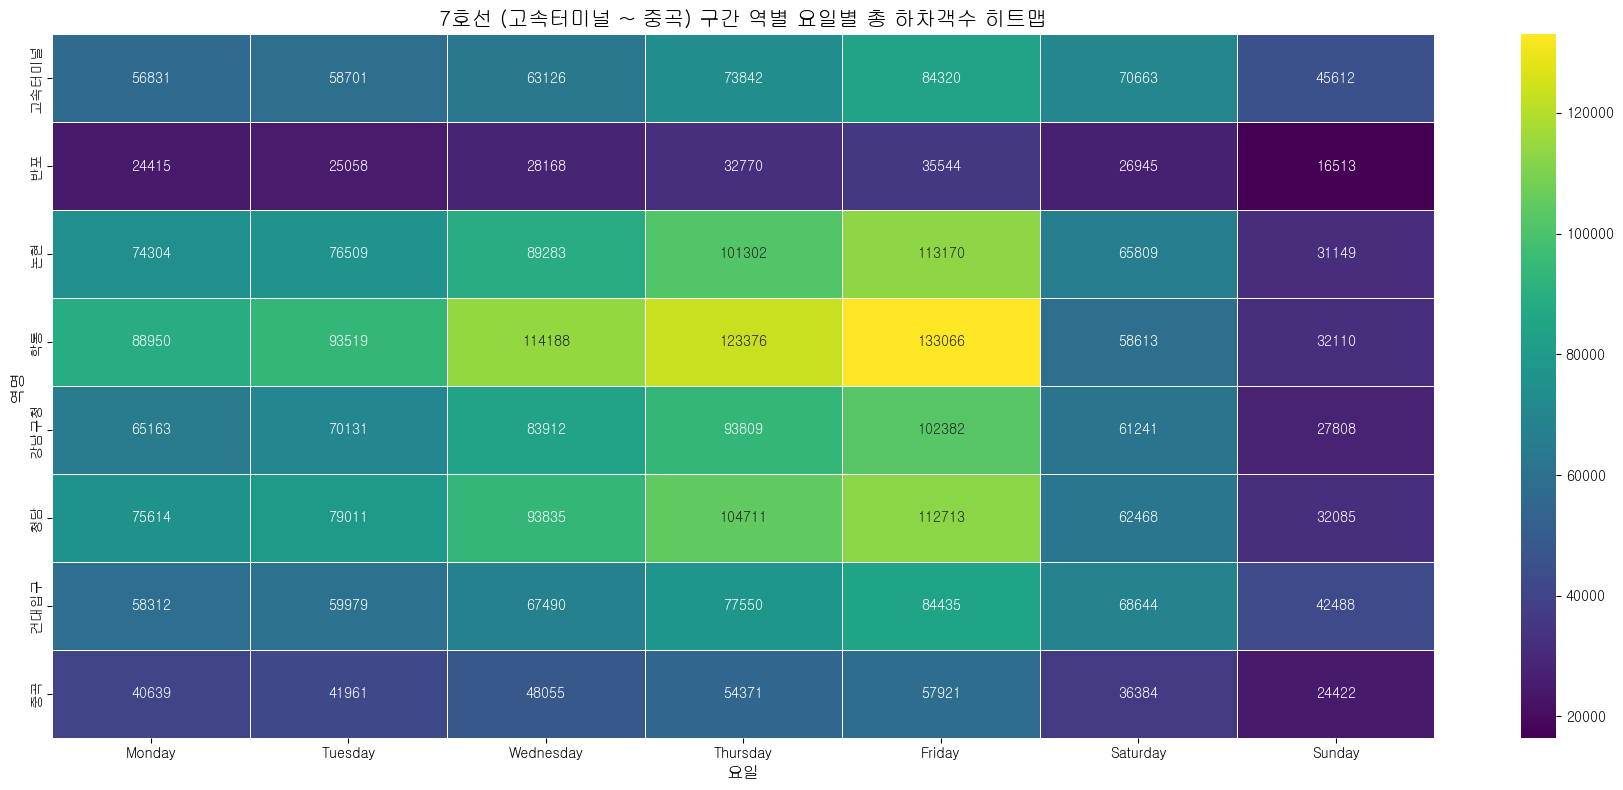

In [53]:
segment_station_daily_pattern['역명'] = pd.Categorical(
    segment_station_daily_pattern['역명'],
    categories=target_stations_7ho,
    ordered=True
)
segment_station_daily_pattern = segment_station_daily_pattern.sort_values('역명')


segment_station_pivot_in = segment_station_daily_pattern.pivot_table(index='역명', columns='요일', values='하차총승객수')
segment_station_pivot_in = segment_station_pivot_in[weekday_order] # 요일 순서 정렬

plt.figure(figsize=(18, max(8, len(segment_station_pivot_in) * 0.5))) # 역 수에 따라 높이 조절
sns.heatmap(segment_station_pivot_in, cmap='viridis', annot=True, fmt=".0f", linewidths=.5, linecolor='white')
plt.title(f'7호선 ({target_stations_7ho[0]} ~ {target_stations_7ho[-1]}) 구간 역별 요일별 총 하차객수 히트맵', fontsize=15)
plt.xlabel('요일', fontsize=12)
plt.ylabel('역명', fontsize=12)
plt.tight_layout()
plt.show()